**Group 6**
---

---
1. Akshat Samdani (0801CS201010)
2. Amogh Mittal (0801CS201011)
3. Aryan Raj Shrivastava (0801CS201021)
4. Abhijeet Chouhan (0801CS201004)
5. Karishma Kesharwani (0801CS201047)
---


# Title:  Kidney Stone Prediction based on Urine Analysis


# Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Kidney Stone Prediction based on Urine Analysis dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

# Importing Neccessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# The Data

In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [ ]:
df.shape

(414, 8)

In [ ]:
df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [ ]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


# EDA

<Axes: xlabel='target', ylabel='count'>

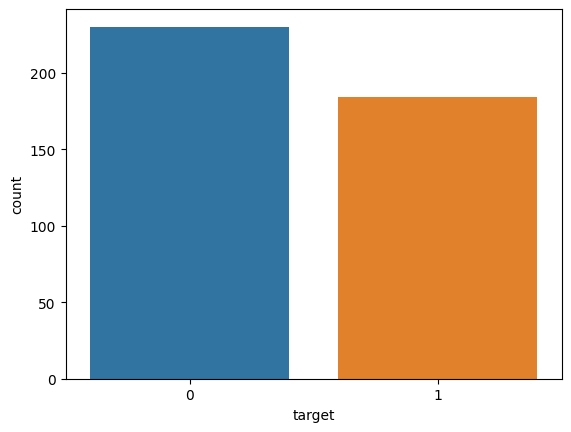

In [ ]:
sns.countplot(x="target",data=df)

<Axes: xlabel='ph', ylabel='target'>

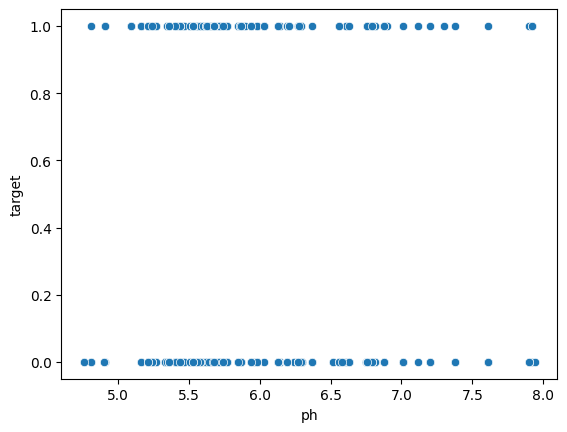

In [ ]:
sns.scatterplot(x='ph',y='target' ,data=df)

<Axes: xlabel='calc', ylabel='target'>

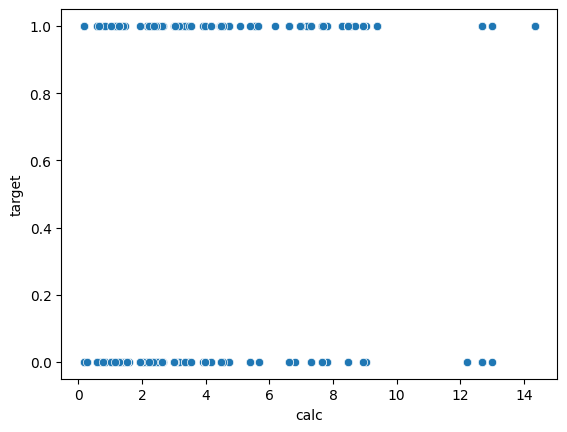

In [ ]:
sns.scatterplot(x='calc',y='target' ,data=df)

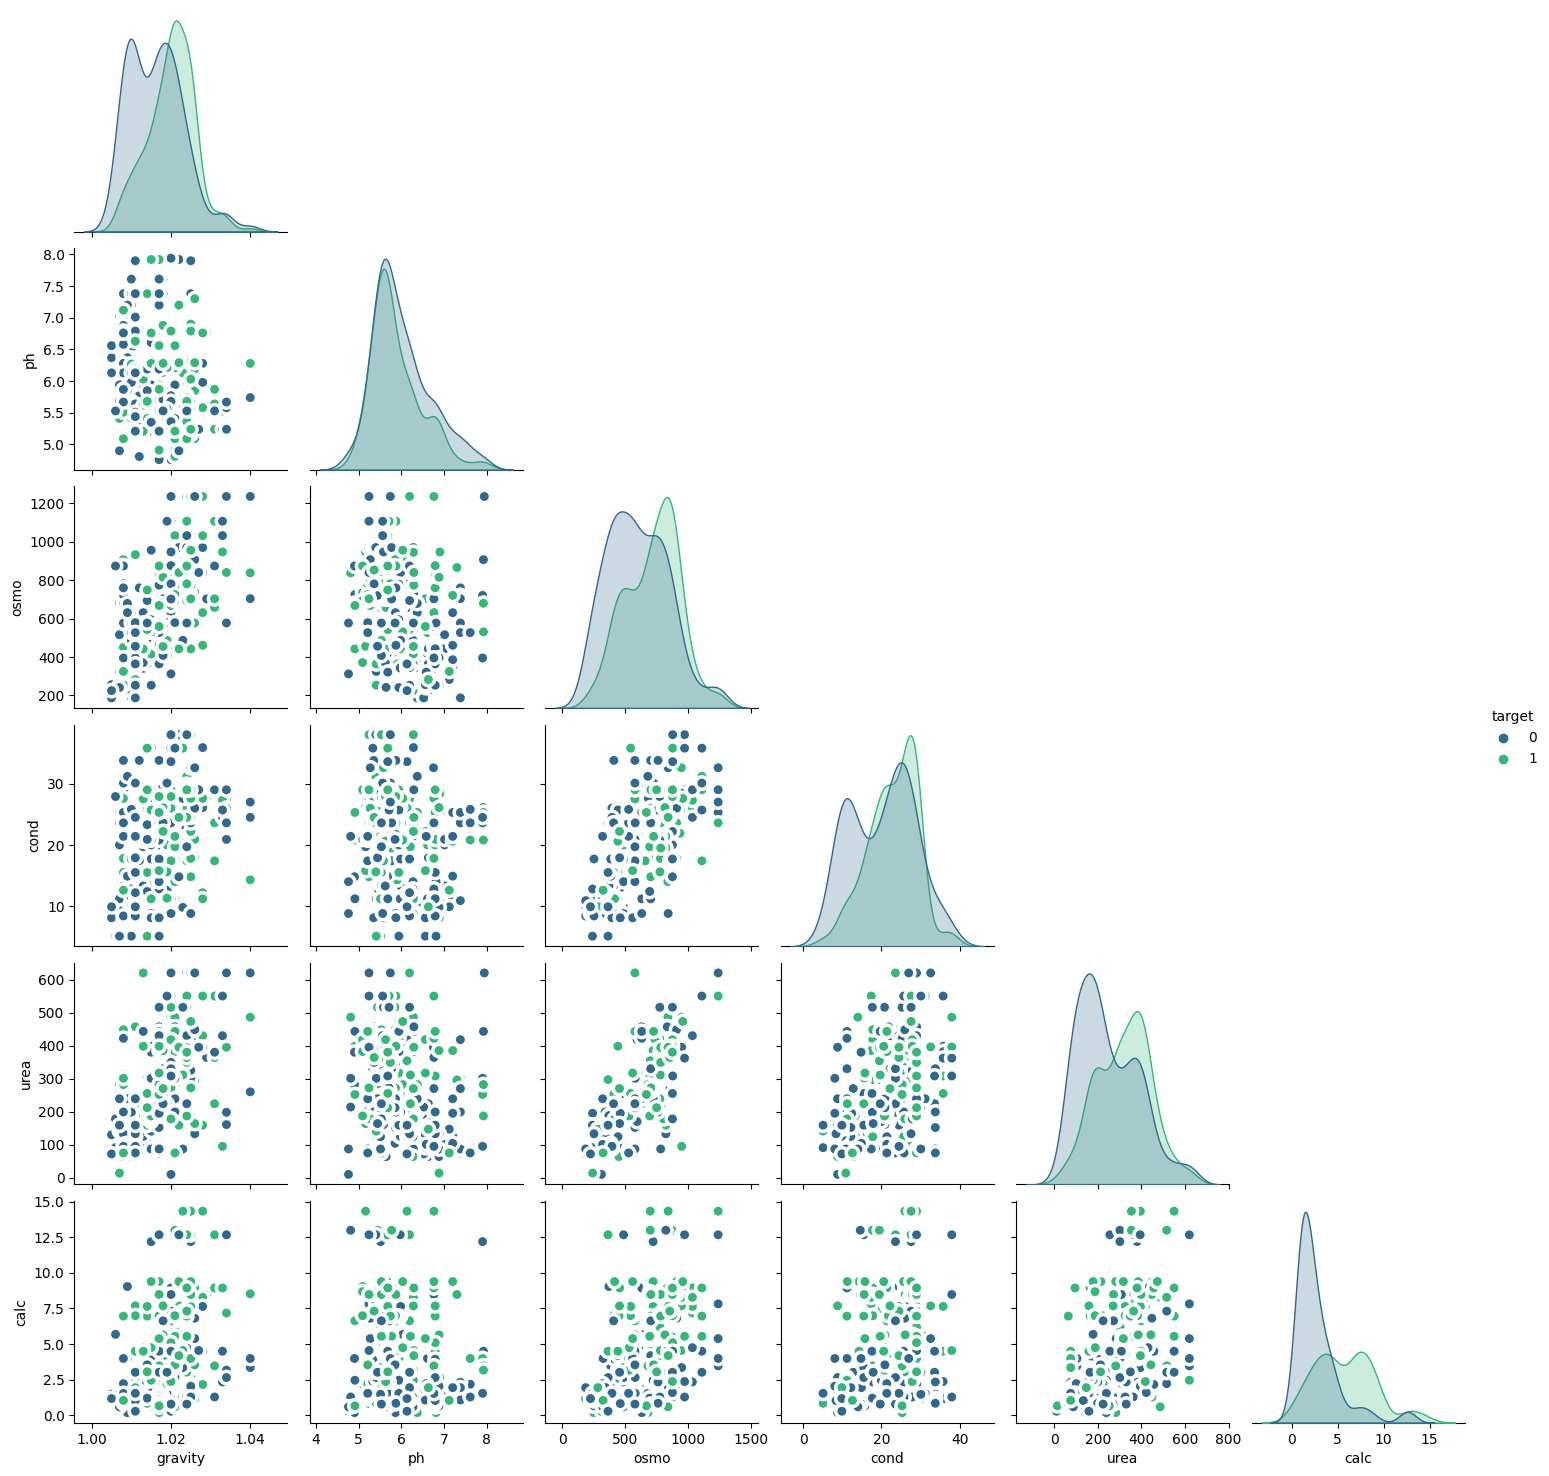

In [ ]:
sns.pairplot(data=df, hue ='target', corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5}, palette='viridis')
plt.show()

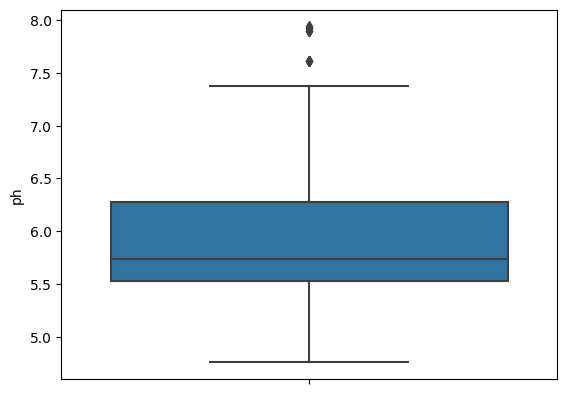

In [ ]:
sns.boxplot( y=df["ph"] );
plt.show()

In [ ]:
df["ph"].describe()

count    414.000000
mean       5.955459
std        0.642260
min        4.760000
25%        5.530000
50%        5.740000
75%        6.280000
max        7.940000
Name: ph, dtype: float64

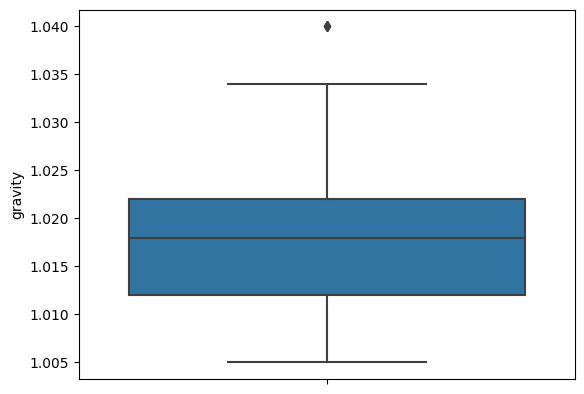

In [ ]:
sns.boxplot( y=df["gravity"]);
plt.show()

In [ ]:
df["gravity"].describe()

count    414.000000
mean       1.017894
std        0.006675
min        1.005000
25%        1.012000
50%        1.018000
75%        1.022000
max        1.040000
Name: gravity, dtype: float64

<Axes: xlabel='ph', ylabel='Count'>

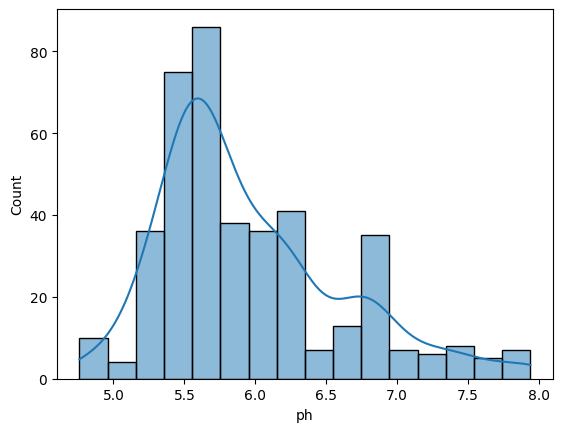

In [ ]:
sns.histplot(data = df["ph"], kde = True)

<Axes: xlabel='urea', ylabel='Count'>

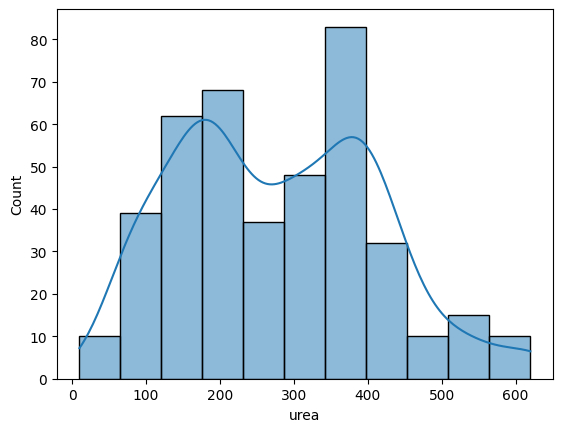

In [ ]:
sns.histplot(data = df["urea"], kde = True)

<Axes: xlabel='calc', ylabel='Count'>

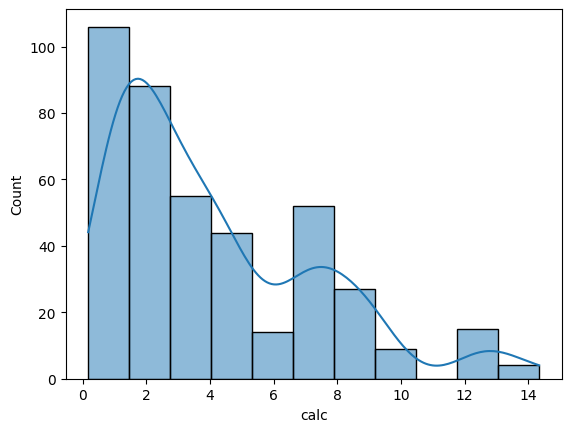

In [ ]:
sns.histplot(data = df["calc"], kde = True)

<Axes: xlabel='gravity', ylabel='Count'>

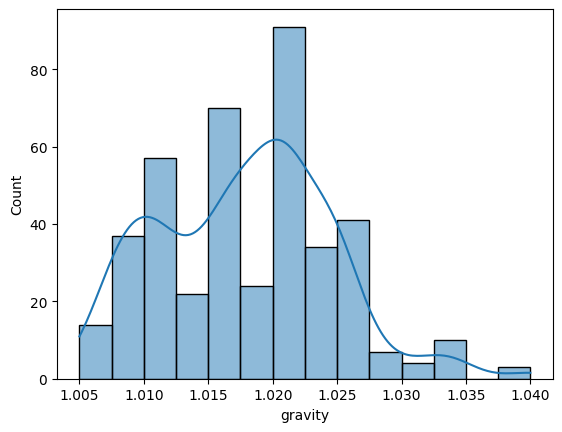

In [ ]:
sns.histplot(data = df["gravity"], kde = True)

# Preprocessing

<Axes: >

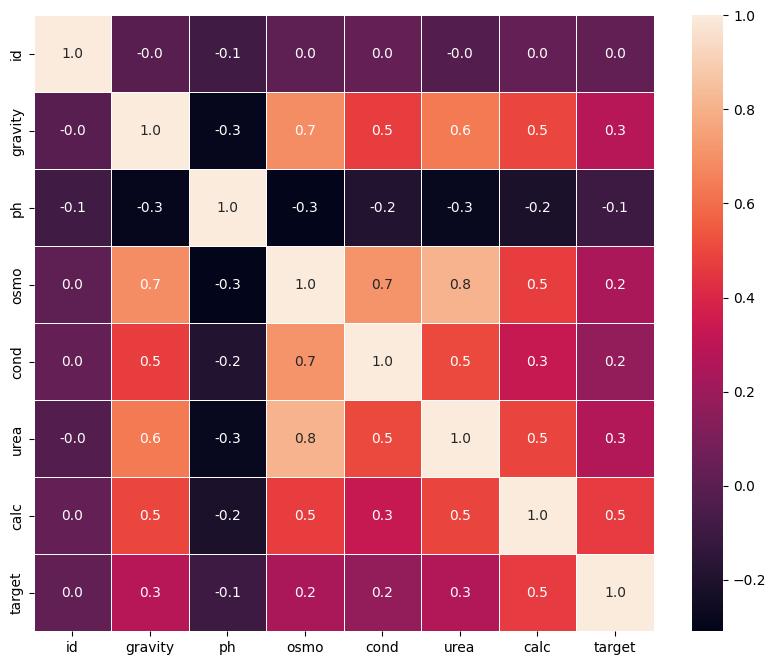

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
df = df.drop("id",axis=1)

# Spliting into Training and Testing Dataset

In [ ]:
y = df["target"]
X = df.drop("target",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

# Trying Different Models

#### Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.776


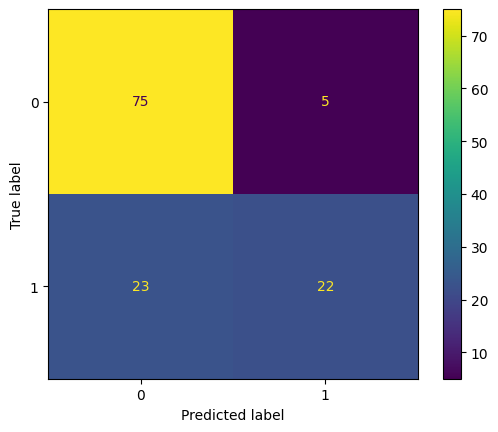

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

<Axes: xlabel='target', ylabel='Density'>

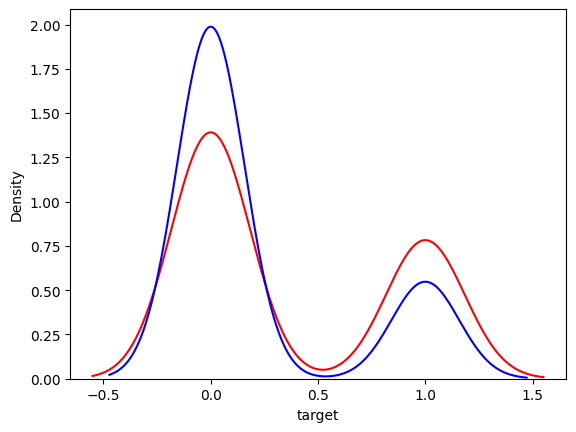

In [ ]:
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values')
sns.distplot(y_pred, hist = False, color = 'b', label = 'Predicted Values', ax = ax1)

#### KNN

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
from sklearn.metrics import accuracy_score
# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.20%


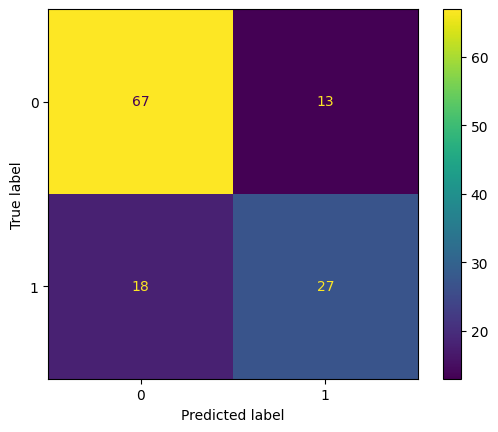

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

###### Hyperparameter Tuning

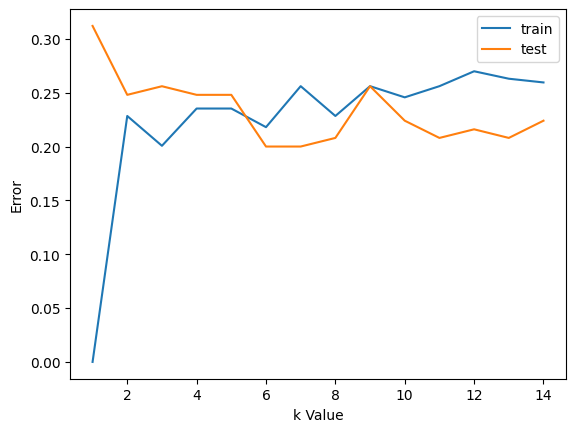

In [ ]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=8)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.20%


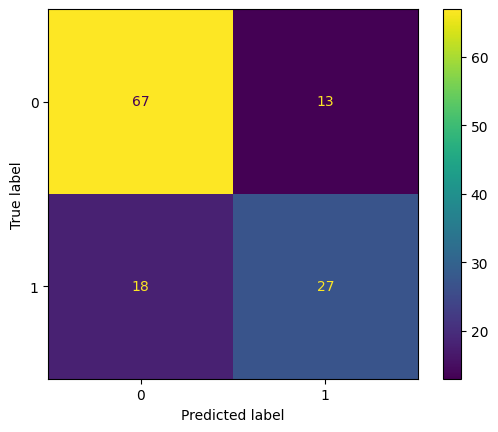

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [ ]:
# Predicting the Test set results  
y_pred = classifier.predict(X_test)  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 73.6


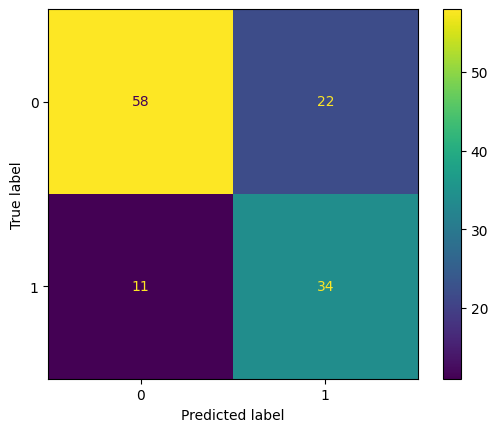

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

##### Hypertuning using CV Methods

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
model = GaussianNB()
gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset (in %): ', accuracy_test*100)

accuracy_score on test dataset (in %):  76.0


In [ ]:
print(gs_NB.best_score_)
print(gs_NB.best_params_)

0.7680000000000001
{'var_smoothing': 1.0}


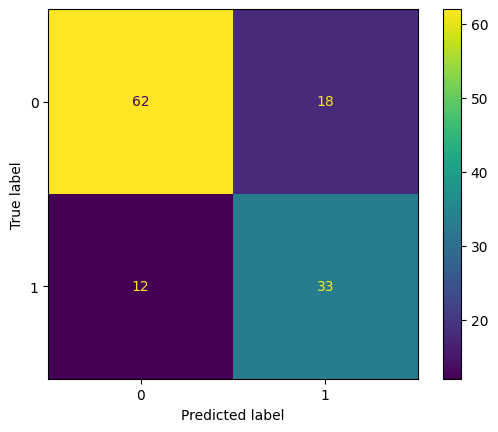

In [ ]:
cm = confusion_matrix(y_test, predict_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### Neural Network

In [ ]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [ ]:
#Hyperparameters
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=6, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [ ]:
sgd=optimizers.SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, epochs=no_epochs, batch_size=128,  verbose=2)

In [ ]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
test_loss , test_acc = model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4878 - acc: 0.8160


In [ ]:
print('test_acc',test_acc*100)

test_acc 81.5999984741211


#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
classifier= DecisionTreeClassifier(criterion='gini', random_state=0, min_samples_split=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(min_samples_split=10, random_state=0)

In [ ]:
y_pred_decision=classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decision))

Accuracy: 0.72


###### Hyperparameter Tuning

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=20)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       random_state=42)

In [ ]:
y_pred_decision=classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decision))

Accuracy: 0.784


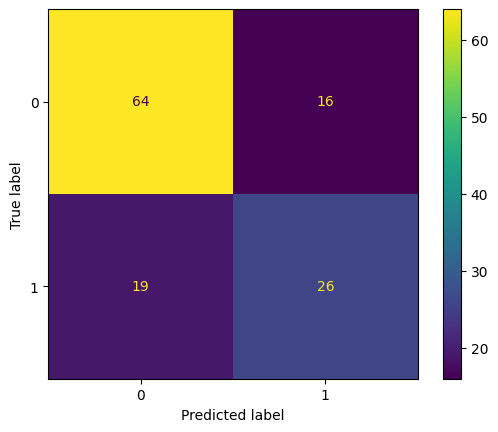

In [ ]:
cm = confusion_matrix(y_test, y_pred_decision)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

<Axes: xlabel='target', ylabel='Density'>

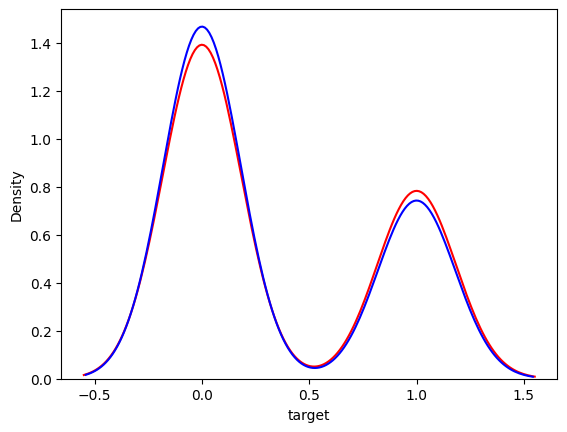

In [ ]:
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values')
sns.distplot(y_pred_decision, hist = False, color = 'b', label = 'Predicted Values', ax = ax1)

#### SVM Classifier

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')  
classifier.fit(X_train, y_train) 
predicted_SVM_rbf = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted_SVM_rbf))

Accuracy: 0.776


In [ ]:
from sklearn.svm import SVC
classifier = SVC(probability=False, kernel='linear')  
classifier.fit(X_train, y_train) 

SVC(kernel='linear')

In [ ]:
y_pred_SVM = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SVM))

Accuracy: 0.784


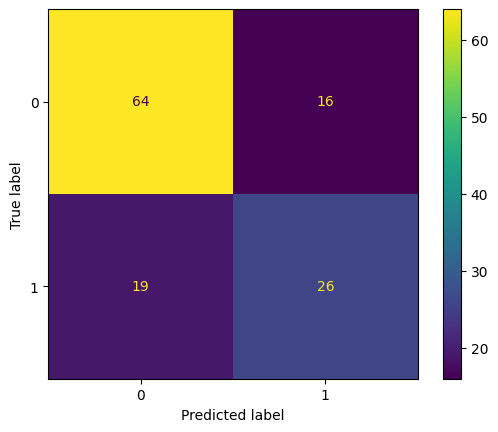

In [ ]:
cm = confusion_matrix(y_test, y_pred_decision)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred= classifier.predict(X_test)  

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.816


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        89
           1       0.64      0.81      0.72        36

    accuracy                           0.82       125
   macro avg       0.78      0.81      0.79       125
weighted avg       0.84      0.82      0.82       125



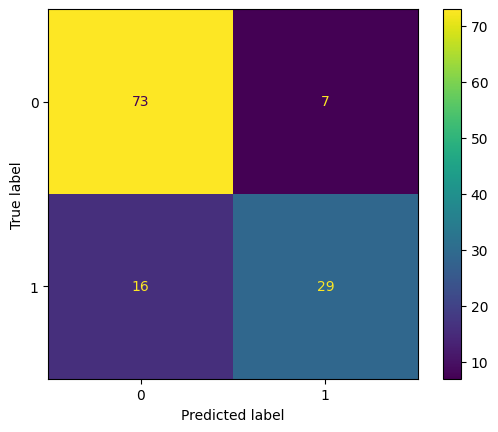

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 50, criterion="gini")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred= classifier.predict(X_test)  
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.808


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        92
           1       0.60      0.82      0.69        33

    accuracy                           0.81       125
   macro avg       0.76      0.81      0.78       125
weighted avg       0.84      0.81      0.82       125



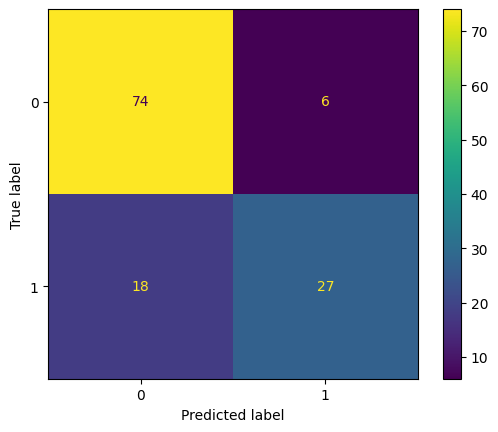

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

##### Hyperparameter Tuning- RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
                       n_estimators=50)


In [ ]:
model_random = RandomForestClassifier(max_depth=3,
                                      max_features=None,
                                      max_leaf_nodes=6,
                                      n_estimators=25)
model_random.fit(X_train, y_train)
y_pred_rand = classifier.predict(X_test)
clf_report = classification_report(y_pred_rand, y_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        85
           1       0.64      0.72      0.68        40

    accuracy                           0.78       125
   macro avg       0.75      0.77      0.76       125
weighted avg       0.79      0.78      0.79       125



In [ ]:
accuracy = accuracy_score(y_test, y_pred_rand)
print("Accuracy:", accuracy)

Accuracy: 0.784


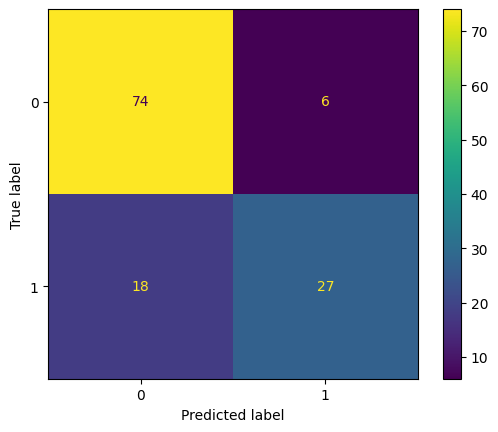

In [ ]:
cm = confusion_matrix(y_test, y_pred_rand)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

##### Hyperparameter Tuning- GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6)


In [ ]:
model_grid = RandomForestClassifier(max_depth=3,
                                    max_features=None,
                                    max_leaf_nodes=6,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = classifier.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        92
           1       0.60      0.82      0.69        33

    accuracy                           0.81       125
   macro avg       0.76      0.81      0.78       125
weighted avg       0.84      0.81      0.82       125



In [ ]:
accuracy = accuracy_score(y_test, y_pred_grid)
print("Accuracy:", accuracy)

Accuracy: 0.808


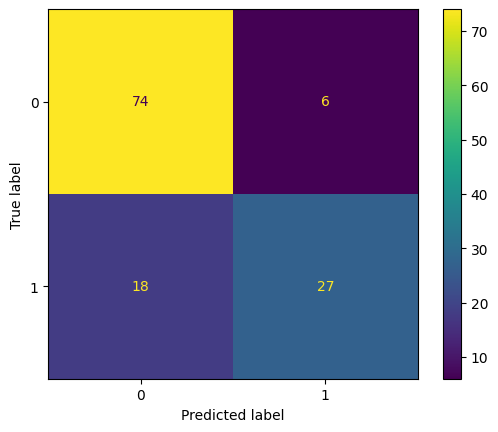

In [ ]:
cm = confusion_matrix(y_test, y_pred_grid)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

##### Trying out CV Techniques

In [ ]:
#Importing Required Modules
from statistics import mean, stdev
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
features = list(df.columns[:-1])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=100, random_state=1)
cvs = cross_val_score(RandomForestClassifier(n_estimators= 100, criterion="entropy"),
                      df[features],
                      df["target"],
                      scoring='roc_auc',
                      cv=cv)
print(f"{cvs.mean():.3f} Random Forest Classifier with all features")


0.786 Random Forest Classifier with all features
